I compared two learning methods in a non-stationary 4-arm bandit problem:
1. Sample Average Method (α = 1/n) - decreasing step-size
2. Constant Step-Size Method (α = 0.1) - fixed step-size

Setup: ε = 0.1, 10,000 steps, 500 independent runs averaged

Environment: q*(a) values start at 0 and drift via random walk N(0, 0.01) each step

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
def run_bandit(steps=10000, runs=500, epsilon=0.1, alpha=None):
    """
    Run non-stationary 4-armed bandit experiment.
    
    alpha=None → Sample average method (α = 1/n)
    alpha=0.1  → Constant step-size method
    """
    n_arms = 4
    avg_rewards = np.zeros(steps)
    optimal_actions = np.zeros(steps)
    
    for run in range(runs):
        # Initialize true values and estimates
        q_true = np.zeros(n_arms)  # True action values q*(a)
        Q = np.zeros(n_arms)       # Estimated values Q(a)
        N = np.zeros(n_arms)       # Action counts
        
        for t in range(steps):
            # Epsilon-greedy action selection
            if np.random.rand() < epsilon:
                action = np.random.randint(n_arms)
            else:
                action = np.random.choice(np.flatnonzero(Q == Q.max()))
            
            # Get reward from N(q*(a), 1)
            reward = np.random.normal(q_true[action], 1)
            avg_rewards[t] += reward
            
            # Track optimal action selection
            if action == np.argmax(q_true):
                optimal_actions[t] += 1
            
            # Update Q estimate
            N[action] += 1
            step_size = alpha if alpha is not None else 1 / N[action]
            Q[action] += step_size * (reward - Q[action])
            
            # Non-stationary: q*(a) random walk with N(0, 0.01)
            q_true += np.random.normal(0, 0.01, n_arms)
    
    return avg_rewards / runs, optimal_actions / runs

In [3]:
# Run experiments
steps = 10000
runs = 500
epsilon = 0.1

print("Running Sample Average Method...")
rewards_sa, optimal_sa = run_bandit(steps=steps, runs=runs, epsilon=epsilon, alpha=None)

print("Running Constant Step-Size Method (α=0.1)...")
rewards_const, optimal_const = run_bandit(steps=steps, runs=runs, epsilon=epsilon, alpha=0.1)

print("\nDone!")

Running Sample Average Method...
Running Constant Step-Size Method (α=0.1)...

Done!


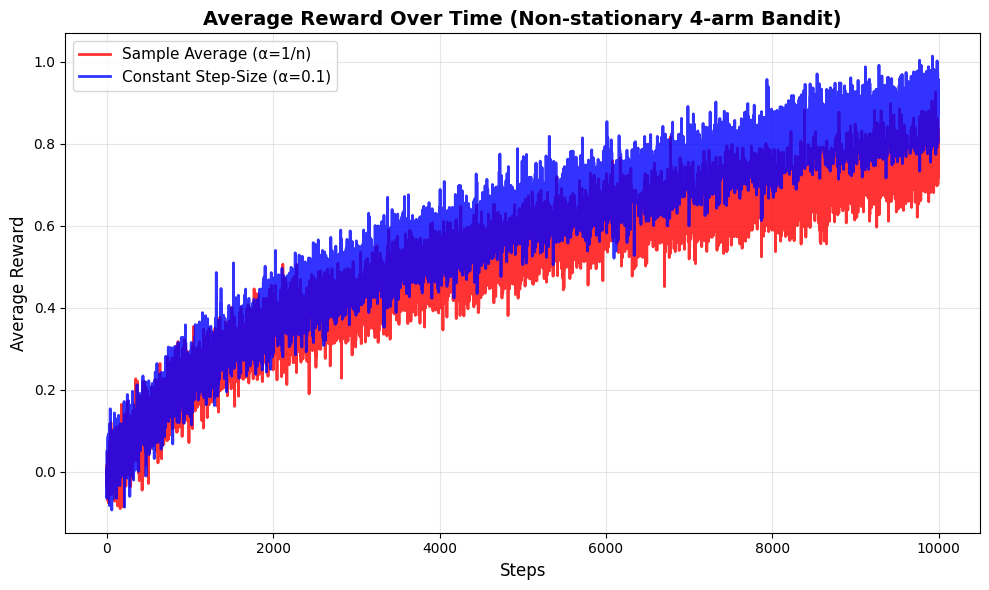

In [4]:
# Plot 1: Average Reward vs Steps
plt.figure(figsize=(10, 6))
plt.plot(rewards_sa, label='Sample Average (α=1/n)', color='red', linewidth=2, alpha=0.8)
plt.plot(rewards_const, label='Constant Step-Size (α=0.1)', color='blue', linewidth=2, alpha=0.8)
plt.xlabel('Steps', fontsize=12)
plt.ylabel('Average Reward', fontsize=12)
plt.title('Average Reward Over Time (Non-stationary 4-arm Bandit)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('reward_vs_timesteps.png', dpi=300, bbox_inches='tight')
plt.show()

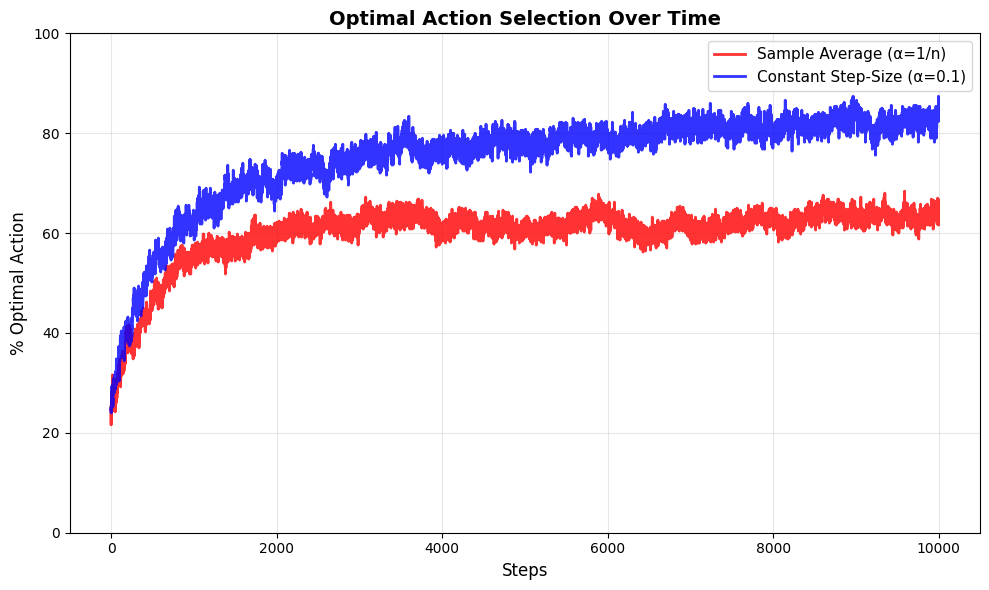

In [5]:
# Plot 2: % Optimal Action vs Steps
plt.figure(figsize=(10, 6))
plt.plot(optimal_sa * 100, label='Sample Average (α=1/n)', color='red', linewidth=2, alpha=0.8)
plt.plot(optimal_const * 100, label='Constant Step-Size (α=0.1)', color='blue', linewidth=2, alpha=0.8)
plt.xlabel('Steps', fontsize=12)
plt.ylabel('% Optimal Action', fontsize=12)
plt.title('Optimal Action Selection Over Time', fontsize=14, fontweight='bold')
plt.ylim(0, 100)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('optimal_action_vs_timesteps.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
# Summary statistics
print("=== Results Summary ===")
print(f"Sample Average - Mean Reward: {np.mean(rewards_sa):.3f}")
print(f"Constant α=0.1 - Mean Reward: {np.mean(rewards_const):.3f}")
print(f"\nSample Average - Optimal Action %: {np.mean(optimal_sa)*100:.2f}%")
print(f"Constant α=0.1 - Optimal Action %: {np.mean(optimal_const)*100:.2f}%")

=== Results Summary ===
Sample Average - Mean Reward: 0.508
Constant α=0.1 - Mean Reward: 0.583

Sample Average - Optimal Action %: 59.96%
Constant α=0.1 - Optimal Action %: 75.01%
